In [22]:
# from torchvision.utils import make_grid
# from torchvision.utils import save_image
from IPython.display import Image
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np
from numpy import asarray
import random
from PIL import Image
import cv2 as cv
import math
import torch
%matplotlib inline
from PIL import Image as im
from sklearn.model_selection import train_test_split
from PIL import Image as im
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import os

# %config InlineBackend.figure_format = ‘retina’

import helper


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# #loading our images
transform = transforms.Compose([transforms.Resize((92,92)),
                                transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor()])
image_dir = 'content/drive/MyDrive/Croped'
image_path = '/' + image_dir
img_path = os.path.join(image_path)
# test_path = os.path.join(image_path, 'test_{}'.format(image_type))

# define datasets using ImageFolder
img_dataset = datasets.ImageFolder(img_path, transform)
# test_dataset = datasets.ImageFolder(test_path, transform)
type(img_dataset)
# create and return DataLoaders

img_loader = DataLoader(dataset=img_dataset,batch_size=len(img_dataset))
image, label = next(iter(img_loader))
x_train, x_test, y_train , y_test = train_test_split(image, label, test_size = 0.2, random_state = 4)
x_train = x_train.numpy().squeeze()
x_train = x_train.transpose(1,2,0)
x_test = x_test.numpy().squeeze()
x_test = x_test.transpose(1,2,0)
y_train = y_train.numpy()
y_test = y_test.numpy()


In [26]:
Class = ['aron','birhanu','dibora','eden','esayas','eyob','gebeyaw','henok','merihun','shibre','sileshi','tesfaye1','tesfaye','tsedeniya','wube']
len(Class)

15

In [27]:
A = np.vstack(x_train)
# A = A.T
A.shape

(8464, 117)

Text(0.5, 1.0, 'tesfaye1')

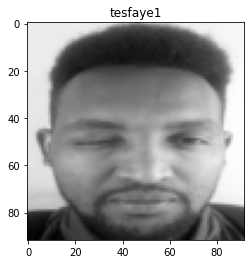

In [31]:
#previewing an image from the loaded data
plt.imshow(A[:,2].reshape(92,92),cmap = 'gray')
plt.title(Class[y_train[2]])

In [52]:

for i in range(len(np.unique(y_train))):
  listt = []
  for j in range(A.shape[1]):
    if(y_train[j] == i):
      listt.append(A[:,j])
  images_at_i = np.array(listt).T
  print(images_at_i.shape)
  # plt.imshow(images_at_i[2])


(8464, 7)
(8464, 5)
(8464, 5)
(8464, 7)
(8464, 9)
(8464, 10)
(8464, 8)
(8464, 7)
(8464, 7)
(8464, 9)
(8464, 10)
(8464, 9)
(8464, 8)
(8464, 7)
(8464, 9)


In [29]:
# because M<(NXN) we do PCA
eg_mean_face = np.mean(A, axis=1)
eg_faces_norm = np.subtract(A, np.expand_dims(eg_mean_face,1))

eg_face_cov = np.cov(eg_faces_norm)
eigen_vecs, eigen_vals, eg_mean = np.linalg.svd(eg_face_cov)

In [43]:
#sorting our eigen vector in descending order
idx = eigen_vals.argsort()[::-1]   
eigen_vals_sort = eigen_vals[idx]
eigen_vecs_sort = eigen_vecs[:,idx]

Text(0.5, 1.0, 'displaying mean face')

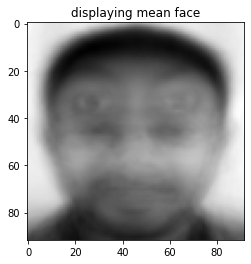

In [44]:
#displaying our mean face
plt.imshow(eg_mean_face.reshape(92,92),cmap = 'gray')
plt.title("displaying mean face")

In [45]:
eigsum = np.sum(eigen_vals_sort);
csum = 0;
for i in range(0, len(y_train)):
    csum = csum + eigen_vals_sort[i]
    tv = csum / eigsum
    if tv > 0.95:
        k = i
        break

In [46]:
#reducing our eigen vectors to n-c dimension
n= A.shape[1]
c = len(np.unique(y_train))
eigvec_red = eigen_vecs_sort[:,0:n-c].real
eigvec_red.shape

(8464, 102)

In [47]:
#calculating projection
omega = np.dot(eigvec_red.T,eg_faces_norm)
omega.shape,eigen_vecs.shape

((102, 117), (8464, 8464))

In [48]:
#calculating our total mean
# tot_mean_face = omega.mean(axis=1, keepdims=True)
# print(tot_mean_face.shape)
# eigvec_red


In [49]:
omega.shape

(102, 117)

In [54]:
#calculating inter and intra class scatter matrices
j= 0
d = omega.shape[0]
with_in = np.zeros((d, d), dtype=np.float32)
between = np.zeros((d, d), dtype=np.float32)
A_norm_i = np.zeros_like(omega)
mean_class = np.zeros((omega.shape[0],len(np.unique(y_train))))

for i in range(0, len(np.unique(y_train))): 
    S = np.zeros((d, d), dtype=np.float32)
    #finding images at class i
    listt = []
    for j in range(A.shape[1]):
      if(y_train[j] == i):
        listt.append(omega[:,j])
    images_at_i = np.array(listt).T

    shape_at_i = images_at_i.shape[0]

    mean_at_i = np.mean(images_at_i,axis=1, keepdims=True)
    

    # mean_class[:,i] = np.squeeze(mean_at_i)
    # print(images_at_i.shape,mean_at_i.shape)
    A_norm_i = np.subtract(images_at_i, mean_at_i)
    print(images_at_i.shape,mean_at_i.shape,A_norm_i.shape)  
    for p in range(images_at_i.shape[1]):
      S += np.matmul(A_norm_i[:,p],A_norm_i[:,p].T)
    # print(A_norm_i.shape)
    with_in += S
    # print(intra_class.shape)
    between += shape_at_i * np.matmul(((mean_at_i - eg_mean_face)),(mean_at_i - eg_mean_face).T )
    # print(inter_class.shape)
    # print(S.shape)


(102, 7) (102, 1) (102, 7)
(102, 5) (102, 1) (102, 5)
(102, 5) (102, 1) (102, 5)
(102, 7) (102, 1) (102, 7)
(102, 9) (102, 1) (102, 9)
(102, 10) (102, 1) (102, 10)
(102, 8) (102, 1) (102, 8)
(102, 7) (102, 1) (102, 7)
(102, 7) (102, 1) (102, 7)
(102, 9) (102, 1) (102, 9)
(102, 10) (102, 1) (102, 10)
(102, 9) (102, 1) (102, 9)
(102, 8) (102, 1) (102, 8)
(102, 7) (102, 1) (102, 7)
(102, 9) (102, 1) (102, 9)


In [15]:
# norm_with_in = np.zeros_like(with_in)
# np.fill_diagonal(norm_with_in, 5)
# with_in += norm_with_in
# mean_at_i.shape,between.shape,with_in.shape


((32, 1), (32, 32), (32, 32))

In [55]:
#calculating LDA 
eigval_fld, eigvec_fld = np.linalg.eig(np.linalg.pinv(with_in).dot(between))
eigvec_fld.shape

(102, 102)

In [56]:
#computing our fisher faces
eigval_fld = eigval_fld.real
eigvec= np.matmul(eigvec_red,eigvec_fld)
eigvec.shape,eigvec_fld.shape
# weights = np.matmul(eigvec.T,mean)
# weights.shape,eigvec.shape

((8464, 102), (102, 102))

Text(0.5, 0.98, 'First 10 Fisher faces')

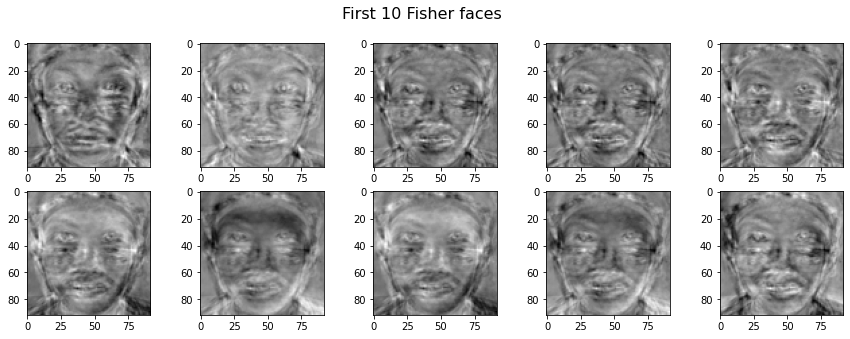

In [57]:
#displaying some of our fisher faces
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigvec[:,i+1].real.reshape(92,92)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Fisher faces", fontsize=16)

In [65]:
# project_class = []
# # print(eigvec.shape,mean_class.shape)
# for i in range(0, len(np.unique(labels))):
#   project_class.append(eigvec.dot(mean_class[:,i]))
  # Reconstruction_k = eigen_vecs[:,:k].dot(omega_k) 
# ax = plt.subplot(2,5,i+1)
# ax.set_title("k = "+str(k+1))
#     print(weights.shape)
project =  eigvec.T.dot(A).real

# print(project.shape,A.shape,eigvec.shape)
# plt.imshow(project.reshape(92,92),cmap='gray');
project.shape

(102, 117)

In [73]:
from sklearn import metrics
# h_train, h_test, ytrain , ytest = train_test_split(hist, y, test_size = 0.2, random_state = 4)
Ks = 35
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(project.T,y_train)
    yhat=neigh.predict(testweights.T)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76666667, 0.7       , 0.7       , 0.6       , 0.66666667,
       0.66666667, 0.6       , 0.63333333, 0.66666667, 0.63333333,
       0.56666667, 0.5       , 0.5       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.36666667, 0.36666667,
       0.33333333, 0.3       , 0.3       , 0.26666667, 0.23333333,
       0.23333333, 0.23333333, 0.2       , 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667])

In [74]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7666666666666667 with k= 1


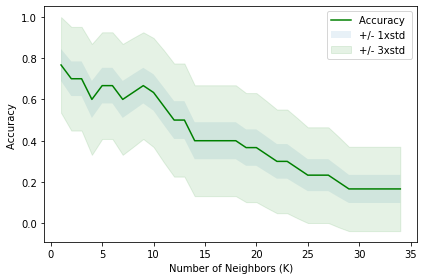

In [75]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3).fit(project.T,y_train)

(8464, 30)

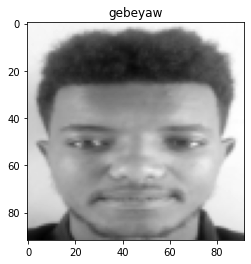

In [61]:
#loading our test image and normalizing it
A_test = np.vstack(x_test)
# A.shape,len(tlabels)

plt.imshow(A_test[:,2].reshape(92,92),cmap='gray')
plt.title(Class[y_test[2]])
A_test.shape

In [66]:
#calculating the weights of training data and the test image
# weights = np.matmul(eigvec.T, A)
testweights = np.matmul(eigvec.T, A_test).real
testweights.shape,A_test.shape,eigvec.T.shape
# weights.shape,testweights.shape,mean_class[0].shape,eigvec.shape

((102, 30), (8464, 30), (102, 8464))

the accuracy is  70.0


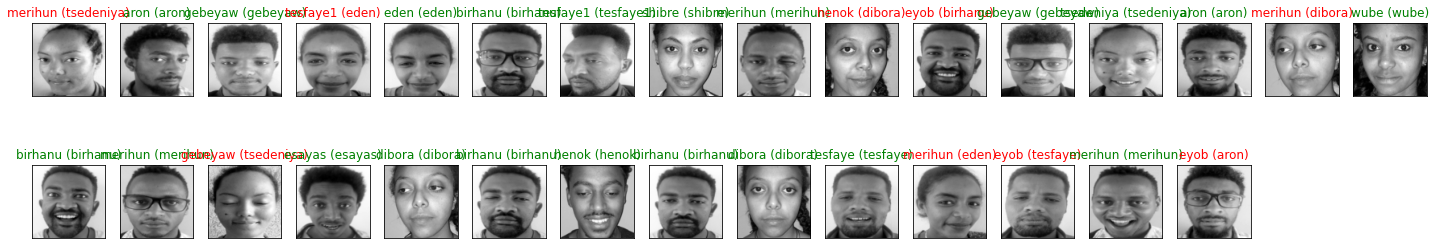

In [79]:
correct=0
fig = plt.figure(figsize=(25, 10))
classifier = neigh.predict(testweights.T)
for i in range(testweights.shape[1]) :
    match = classifier[i]
    if y_test[i] == match:
        correct+=1
    ax = fig.add_subplot(4, A_test.shape[1]/2+1, i+1, xticks=[], yticks=[])
    img = A_test[:,i]
#     print(img.shape)
    plt.imshow(img.reshape(92,92),cmap='gray') 
    ax.set_title("{} ({})".format(Class[match], Class[y_test[i]]),
                 color=("green" if Class[match]==Class[y_test[i]] else "red"))

print("the accuracy is ",correct/testweights.shape[1]*100)
        
        
# reconstructed_face = reduced_eigen.dot(omega_t)
# plt.imshow(reconstructed_face.reshape(92,92)+mean_face.reshape(92,92),cmap='gray')

In [25]:
testweights.shape
print(tlabel_vals)
neigh.predict(testweights.T)

['Dibora', 'Henok', 'Shibre', 'Wube']


array(['Dibora', 'Shibre', 'Shibre', 'Wube'], dtype='<U6')

In [ ]:
# if dist < 50000:
# else:
#     print ("subject not found in database")